**Task One: Data preparation and customer analytics**

Conducting analysis on client's transaction dataset and identifying customer purchasing behaviours to generate insights and provide commercial recommendations.

**Data Dictionary**

- **DATE:** The date transaction was made
- **CLEANED_DATE:** The cleaner date version
- **STORE_NBR:** The store number
- **LYLTY_CARD_NBR:** Loyalty card number
- **TXN_ID:** Tax number ID
- **PROD_NBR:** Product number ID
- **PROD_NAME:** Product name
- **PROD_QTY:** Product quantity
- **TOT_SALES:** Total sales
- **LIFESTAGE:** Customer demography type of family setting
- **PREMIUM_CUSTOMER:** Type of customer value (Premium, Mainstream, Budget)

**Understanding and cleaning transaction and customer data.**

**Transaction Data**

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
import openpyxl

In [ ]:
# Uploading the transaction data as df
# Data is directly connected to goodgle drive from google colab console
df = pd.read_excel('/content/drive/MyDrive/Analytical Engineering /Portfolio/QVI_transaction_data.xlsx', engine='openpyxl', sheet_name='in')

In [ ]:
# Read data first 5 rows
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# View the shape of the DataFrame
# rows = 264,836
# columns = 8
print("Shape:", df.shape)

Shape: (264836, 8)


In [ ]:
# Checking the info about columns, data types, and non-null values
# 6 columns are integers
# 1 column is object
# 1 column is float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
# Checking the summary statistics for numerical columns
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
# Viewing column names
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [ ]:
# Counting unique values per column
df.nunique()

,0
DATE,364
STORE_NBR,272
LYLTY_CARD_NBR,72637
TXN_ID,263127
PROD_NBR,114
PROD_NAME,114
PROD_QTY,6
TOT_SALES,112


In [ ]:
# Checking for duplicated rows
# No duplicated rows
df.duplicated().sum()

np.int64(1)

In [ ]:
# Summary of categorical features
df.select_dtypes(include='object').describe()

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


In [ ]:
# Checking for missing values
# No missing values
df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [ ]:
# Converting serial date to datetime (Excel uses 1900 date system by default)
df['CLEANED_DATE'] = pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')

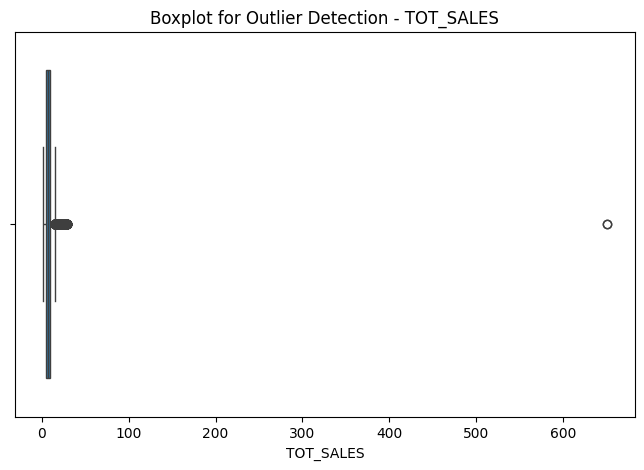

In [ ]:
# Fixing date column as  anew cleaned and formatted column cleaned_date

# Convert serial date to datetime (Excel uses 1900 date system by default)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TOT_SALES'])
plt.title('Boxplot for Outlier Detection - TOT_SALES')
plt.xlabel('TOT_SALES')
plt.show()


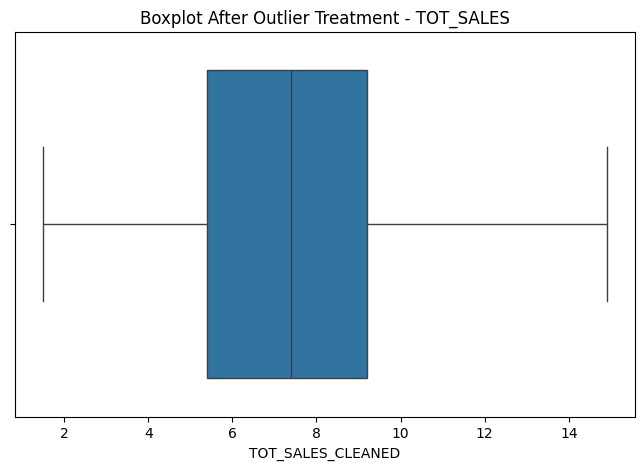

In [ ]:
# FixINg outliers in 'TOT_SALES' using IQR method
Q1 = df['TOT_SALES'].quantile(0.25)
Q3 = df['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['TOT_SALES_CLEANED'] = df['TOT_SALES'].clip(lower=lower_bound, upper=upper_bound)

# Boxplot of cleaned data
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TOT_SALES_CLEANED'])
plt.title('Boxplot After Outlier Treatment - TOT_SALES')
plt.xlabel('TOT_SALES_CLEANED')
plt.show()

In [ ]:
# Computing the correlation matrix
correlation = df.corr(numeric_only=True)

# Choosing a valid Plotly pastel-like color scale
colorscale = 'pinkyl'

# Creating heatmap using Plotly Graph Objects
fig = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.index,
    colorscale=colorscale,
    colorbar=dict(title='Correlation Coefficient')
))

fig.update_layout(
    title='Correlation Heatmap (Pastel Theme)',
    xaxis_title='Features',
    yaxis_title='Features',
    width=800,
    height=600,
    template='plotly_white'
)

fig.show()


**Customer Data**

In [ ]:
# Data is directly connected to goodgle drive from google colab console
df1 = pd.read_csv('/content/drive/MyDrive/Analytical Engineering /Portfolio/QVI_purchase_behaviour.csv')

In [ ]:
# Read data first 5 rows
df1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# View the shape of the DataFrame
# rows = 72,637
# columns = 3
print("Shape:", df1.shape)

Shape: (72637, 3)


In [ ]:
# Checking the info about columns, data types, and non-null values
# 2 columns are objects
# 1 column is integer
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Checking the summary statistics for numerical columns
df1.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [ ]:
# Counting unique values per column
df.nunique()

,0
DATE,364
STORE_NBR,272
LYLTY_CARD_NBR,72637
TXN_ID,263127
PROD_NBR,114
PROD_NAME,114
PROD_QTY,6
TOT_SALES,112
TOT_SALES_CLEANED,82
CLEANED_DATE,364


In [ ]:
# Checking for duplicated rows
# No duplicated rows
df.duplicated().sum()

np.int64(1)

In [ ]:
# Viewing unique values of column LIFESTAGE
lifestage_values = df1['LIFESTAGE'].value_counts()
print(f"LIFESTAGE UNIQUE VALUES: {lifestage_values}")

LIFESTAGE UNIQUE VALUES: LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


In [ ]:
# Viewing unique values of column PREMIUM_CUSTOMER
customer_values = df1['PREMIUM_CUSTOMER'].value_counts()
print(f"PREMIUM CUSTOMER UNIQUE VALUES: {customer_values}")

PREMIUM CUSTOMER UNIQUE VALUES: PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


In [ ]:
# Checking for missing values
# No missing values
df1.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
# Append df1 to df as a new data table (stacked vertically)
# Ensure both DataFrames have the same columns
# Merge using inner join with column LYLTY_CARD_NBR
df_merged = pd.merge(df, df1, on='LYLTY_CARD_NBR', how='inner', suffixes=('_df', '_df1'))

print(df_merged)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips 

In [ ]:
# Viewing merged data
df_merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TOT_SALES_CLEANED,CLEANED_DATE,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,6.0,2018-10-17,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,6.3,2019-05-14,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2.9,2019-05-20,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,14.9,2018-08-17,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,13.8,2018-08-18,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
# Moving CLEANED_DATE to the first column
df_merged = df_merged[['CLEANED_DATE'] + [col for col in df_merged.columns if col != 'CLEANED_DATE']]

In [ ]:
# Viewing dataset
df_merged.head()

,CLEANED_DATE,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TOT_SALES_CLEANED,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,14.9,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,13.8,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
# Dropping unecessary columns from data
df_merged = df_merged.drop(columns=['DATE', 'LIFESTAGE_df', 'PREMIUM_CUSTOMER_df', 	'TOT_SALES'], errors='ignore')

In [ ]:
# Viewing dataset
df_merged.head()

,CLEANED_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES_CLEANED,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,14.9,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
# Code to rename column
# Define your renaming dictionary
rename_column = {
    'TOT_SALES_CLEANED': 'TOT_SALES',
    'LIFESTAGE_df1': 'LIFESTAGE',
    'PREMIUM_CUSTOMER_df1': 'PREMIUM_CUSTOMER'
}

# Apply renaming
df_merged = df_merged.rename(columns=rename_column)

In [ ]:
# View dataset
df_merged.head()

,CLEANED_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,14.9,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
import os

# Create the directory if it doesn't exist
folder_path = '/content/drive/MyDrive/Analytical Engineering /Portfolio'
os.makedirs(folder_path, exist_ok=True)

# Full file path
save_path = os.path.join(folder_path, 'cleaned_data.csv')

# Save the DataFrame
df_merged.to_csv(save_path, index=False)

print(f"File saved successfully to: {save_path}")

File saved successfully to: /content/drive/MyDrive/Analytical Engineering /Portfolio/cleaned_data.csv


#### Link to dashboard on looker [Dashboard](https://lookerstudio.google.com/u/1/reporting/792339d9-1768-400d-a709-9e9fd2cd4998/page/ATFQF)